<a href="https://colab.research.google.com/github/gustikresna/purwadhika-assignment/blob/main/Modul_3_Ensemble_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
import matplotlib.pyplot as plt

     |████████████████████████████████| 81kB 8.3MB/s 


In [ ]:
import category_encoders as ce

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### PYTHON EXERCISE : VOTING CLASSIFIER

Analyze data white_wine.csv

* Apply Voting Classifier
  * target : quality (quality >6 → Y = 1)
  * features : density alcohol
* Validate the model using precision, recall and f1 score in 20% testing data
* Apply soft voting classifier method, using these following method:
  * logistic regression
  * decision tree : max depth 5
  * knn : nearest neighbor 3
* Apply soft voting classifier method, using these following method
  * 3rd degree polynomial features + logistic regression
  * decision tree : max depth 5
  * standard scaler + knn : nearest neighbor 3

In [ ]:
white_wine = pd.read_csv('white_wine.csv')

In [ ]:
white_wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      1
sulphates               1
alcohol                 1
quality                 1
dtype: int64

In [ ]:
white_wine = white_wine.dropna()

In [ ]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0


In [ ]:
white_wine['target'] = np.where(white_wine['quality'] > 6, 1, 0)

In [ ]:
y = white_wine['target']
X = white_wine[['density', 'alcohol']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2021)

1. Voting Classifier (w/o preprocessing)

In [ ]:
logreg = LogisticRegression()
tree = DecisionTreeClassifier(max_depth=5)
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
ensemble = VotingClassifier(estimators=[('lr', logreg), ('tree', tree), ('knn', knn)], voting='soft')

In [ ]:
ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98        83
           1       0.87      0.95      0.91        21

    accuracy                           0.96       104
   macro avg       0.93      0.96      0.94       104
weighted avg       0.96      0.96      0.96       104



2. Data Preprocessing + Ensemble

3rd Degree Polynomial Features + Logistic Regression

In [ ]:
poly = PolynomialFeatures(degree = 3)
X_train_poly = pd.DataFrame(poly.fit_transform(X_train))
X_train_poly.columns = poly.get_feature_names(X_train.columns)

In [ ]:
X_train_poly.head()

,1,density,alcohol,density^2,density alcohol,alcohol^2,density^3,density^2 alcohol,density alcohol^2,alcohol^3
0,1.0,0.9984,9.9,0.996803,9.88416,98.01,0.995208,9.868345,97.853184,970.299
1,1.0,0.9964,11.4,0.992813,11.35896,129.96,0.989239,11.318068,129.492144,1481.544
2,1.0,0.9906,11.8,0.981288,11.68908,139.24,0.972064,11.579203,137.931144,1643.032
3,1.0,0.9960,9.9,0.992016,9.86040,98.01,0.988048,9.820958,97.617960,970.299
4,1.0,1.0010,8.8,1.002001,8.80880,77.44,1.003003,8.817609,77.517440,681.472


In [ ]:
logreg = LogisticRegression()

Decision Tree

In [ ]:
tree = DecisionTreeClassifier(max_depth=5)

Standard Scaler + kNN

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_scaler = pd.DataFrame(scaler.fit_transform(X_train))
X_train_scaler.columns = X_train.columns

In [ ]:
X_train_scaler.head()

,density,alcohol
0,1.105576,-0.187518
1,0.366030,1.208771
2,-1.778651,1.581114
3,0.218121,-0.187518
4,2.066985,-1.211462


In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
poly_logreg = Pipeline([('p', PolynomialFeatures(degree=3)), ('m', LogisticRegression())])
tree = DecisionTreeClassifier(max_depth=5)
scaler_knn = Pipeline([('p', StandardScaler()), ('m', KNeighborsClassifier(n_neighbors=3))])

In [ ]:
models = [('lr', poly_logreg), ('tree', tree), ('knn', scaler_knn)]

In [ ]:
ensemble = VotingClassifier(estimators=models, voting='soft')

In [ ]:
ensemble.fit(X_train, y_train)
y_pred1 = ensemble.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98        83
           1       0.91      0.95      0.93        21

    accuracy                           0.97       104
   macro avg       0.95      0.96      0.96       104
weighted avg       0.97      0.97      0.97       104



### PYTHON EXERCISE : RANDOM FOREST

Analyze data bankloan.csv
* Apply Random Forest:
  * target : default
  * features : age, employ, employ, debtinc, creddebt, othdebt
* Splitting ratio 80:20 stratified
* Apply Random Forest n_estimator 20 max features 4 max depth 3
* Compute precision, recall, f1 score in test set

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
bankloan = pd.read_csv('bankloan.csv')

In [ ]:
bankloan.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1


In [ ]:
y = bankloan['default'].copy()
X = bankloan[['age', 'employ', 'debtinc', 'creddebt', 'othdebt']].copy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021, stratify=y)

In [ ]:
rf = RandomForestClassifier(n_estimators=20, max_features=4, max_depth=3)
rf. fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89       103
           1       0.83      0.41      0.55        37

    accuracy                           0.82       140
   macro avg       0.83      0.69      0.72       140
weighted avg       0.82      0.82      0.80       140



### APPLY SEVERAL PREPROCESSING METHOD TO MODELING AT ONCE AND DO HYPERPARAMETER TUNING MODEL BOOSTING

data : adult.csv

target : income

preprocess:
1. missing value : simple imputer with constant
2. one hot encoding : relationship, race, sex
3. binary encoding : workclass, marital status, occupation, native country
4. ordinal encoding : education (already encoded)
5. no treatment : numerical
6. out : fnlwgt

Random state 10, data splitting 70:30 stratify
1. tree : model tree(max depth 3) and compute precision, recall, f1 in test set then compute the feature importances and
show the tree
2. adaboost : tree adaptive boosting(max depth 3, n estimator(B) 200, learning rate 0.1) and compute precision, recall, f1 in
test set then compute the feature importances
3. gbc : gradient boosting(max depth 3, n estimator(B) 200, learning rate 0.1) and compute precision, recall, f1 in test set
then compute the feature importances
4. xgb :extreme gradient boosting(max depth 3, n estimator(B) 200, learning rate 0.1) and compute precision, recall, f1 in test
set then compute the feature importances
5. Model selection using grid search (tree, tree adaboost, gbc, xgb) optimized by f1 and using stratified CV 5 fold
6. Hyperparameter tuning tree adaboost (optimize B L max depth) optimized by f1 and using stratified CV 5 fold
7. Evaluate the tuned model in test set precision, recall, f1 score ROC, PRC and compare the result (before after)

In [ ]:
adult = pd.read_csv('adult.csv')
adult.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [ ]:
y = adult['income'].copy()

Data Preprocessing

In [ ]:
imputer = SimpleImputer(missing_values='?', strategy='constant')
imputed_adult = pd.DataFrame(imputer.fit_transform(adult))
imputed_adult.columns = adult.columns

In [ ]:
onehot = OneHotEncoder(sparse=False)
onehot_df = pd.DataFrame(onehot.fit_transform(imputed_adult[['relationship','race','sex']]))
onehot_df.columns = onehot.get_feature_names(['relationship','race','sex'])

In [ ]:
binary = ce.BinaryEncoder()
binary_df = pd.DataFrame(binary.fit_transform(imputed_adult[['workclass', 'marital.status', 'occupation', 'native.country']]))

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
X = pd.concat([onehot_df, binary_df, imputed_adult[['age','education.num','capital.gain','capital.loss','hours.per.week']]], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3, stratify=y, random_state=2021)

1. Tree

In [ ]:
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, y_train)
y_pred_1 = tree.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

       <=50K       0.85      0.95      0.90      7417
        >50K       0.77      0.47      0.59      2352

    accuracy                           0.84      9769
   macro avg       0.81      0.71      0.74      9769
weighted avg       0.83      0.84      0.82      9769



In [ ]:
feat_imp = pd.DataFrame(tree.tree_.compute_feature_importances(normalize=False)).transpose()
feat_imp.columns = X.columns

In [ ]:
feat_imp = feat_imp.loc[:, (feat_imp != 0).any(axis=0)]
feat_imp

,relationship_Husband,relationship_Wife,age,education.num,capital.gain
0,0.059241,0.011956,0.000166,0.027217,0.03545


In [ ]:
feat_imp.shape

(1, 5)

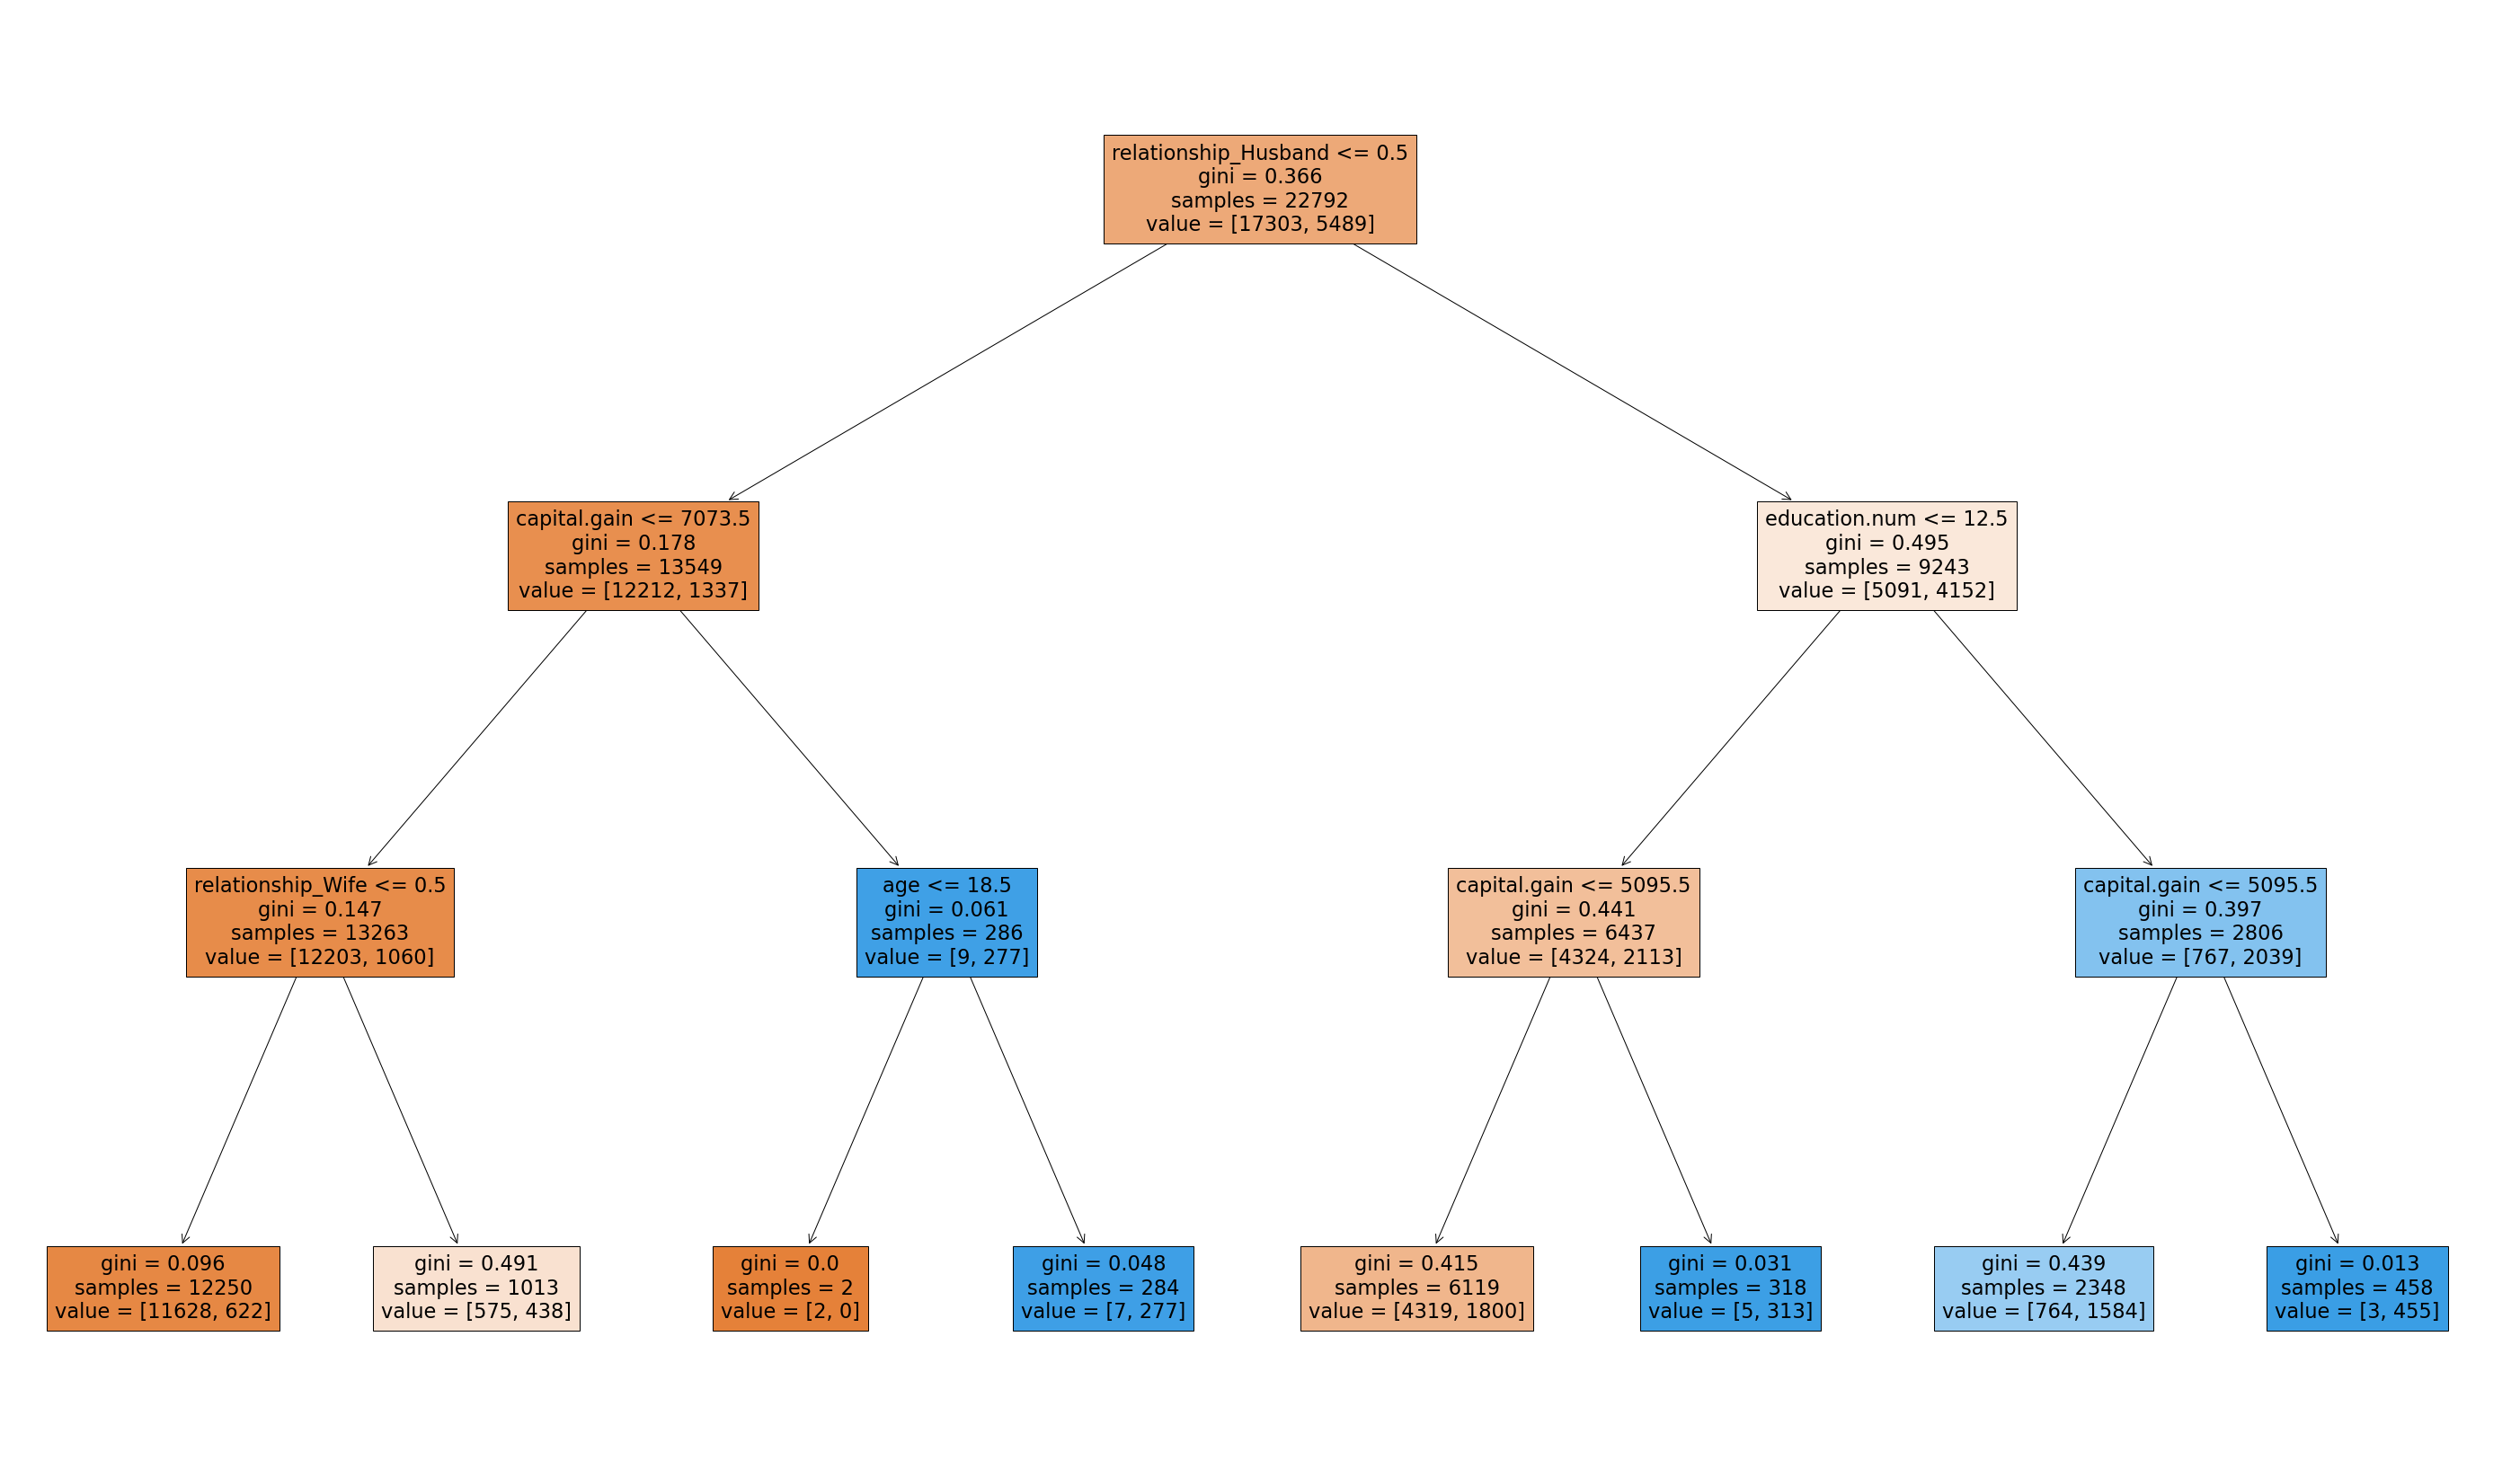

In [ ]:
plt.figure(figsize=(50,30))
plot_tree(tree, feature_names=X.columns, filled=True)
plt.show()

2. Adaboost

In [ ]:
abc = AdaBoostClassifier(base_estimator=tree, n_estimators=200, learning_rate=0.1)

In [ ]:
abc.fit(X_train, y_train)
y_pred_2 = abc.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

       <=50K       0.89      0.95      0.92      7417
        >50K       0.79      0.64      0.71      2352

    accuracy                           0.87      9769
   macro avg       0.84      0.79      0.81      9769
weighted avg       0.87      0.87      0.87      9769



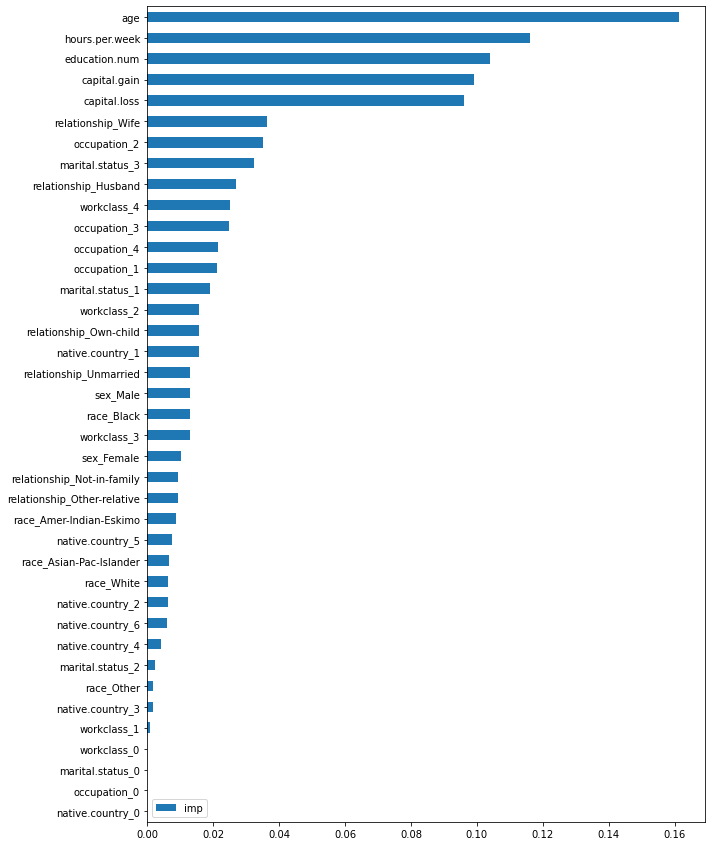

In [ ]:
importance_table = pd.DataFrame({'imp': abc.feature_importances_}, index=X.columns)
importance_table.sort_values(by='imp').plot(kind='barh', figsize=(10,15))

In [ ]:
feat_imp2 = pd.DataFrame(adb.feature_importances_).transpose()
feat_imp2.columns = X.columns

In [ ]:
feat_imp2 = feat_imp2.loc[:, (feat_imp2 != 0).any(axis=0)]
feat_imp2

,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,workclass_1,workclass_2,workclass_3,workclass_4,marital.status_1,marital.status_2,marital.status_3,occupation_1,occupation_2,occupation_3,occupation_4,native.country_1,native.country_2,native.country_3,native.country_4,native.country_5,native.country_6,age,education.num,capital.gain,capital.loss,hours.per.week
0,0.026936,0.009405,0.009368,0.015813,0.013131,0.03661,0.008729,0.00684,0.013001,0.001712,0.006383,0.010022,0.0133,0.000853,0.015843,0.012911,0.025085,0.018685,0.002683,0.032397,0.021238,0.03529,0.024822,0.02153,0.015639,0.005909,0.00165,0.004187,0.007615,0.006173,0.161128,0.103948,0.099004,0.096068,0.116092


In [ ]:
feat_imp2.shape

(1, 35)

3. Gradient Boosting

In [ ]:
gbc = GradientBoostingClassifier(max_depth=3, n_estimators=200, learning_rate=0.1)

In [ ]:
gbc.fit(X_train, y_train)
y_pred_3 = gbc.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_3))

              precision    recall  f1-score   support

       <=50K       0.89      0.95      0.92      7417
        >50K       0.80      0.63      0.71      2352

    accuracy                           0.87      9769
   macro avg       0.84      0.79      0.81      9769
weighted avg       0.87      0.87      0.87      9769



In [ ]:
feat_imp3 = pd.DataFrame(gbc.feature_importances_).transpose()
feat_imp3.columns = X.columns

In [ ]:
feat_imp3 = feat_imp3.loc[:, (feat_imp3 != 0).any(axis=0)]
feat_imp3

,relationship_Husband,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_White,sex_Female,sex_Male,workclass_1,workclass_2,workclass_3,workclass_4,marital.status_1,marital.status_2,marital.status_3,occupation_1,occupation_2,occupation_3,occupation_4,native.country_1,native.country_2,native.country_3,native.country_4,native.country_5,native.country_6,age,education.num,capital.gain,capital.loss,hours.per.week
0,0.247291,0.001005,0.00031,0.000174,0.056901,0.000444,0.000131,0.000261,0.000795,0.003276,0.002791,0.000035,0.001741,0.001023,0.002515,0.002396,0.000007,0.056419,0.002199,0.005198,0.000441,0.047606,0.000091,0.00024,0.000085,0.000365,0.000426,0.000632,0.058897,0.182947,0.216787,0.06945,0.037123


In [ ]:
feat_imp3.shape

(1, 33)

4. Extreme Gradient Boosting

In [ ]:
xgb = XGBClassifier(max_depth=3, n_estimators=200, learning_rate=0.1)

In [ ]:
xgb.fit(np.array(X_train), np.array(y_train))
y_pred_4 = xgb.predict(np.array(X_test))

In [ ]:
print(classification_report(y_test, y_pred_4))

              precision    recall  f1-score   support

       <=50K       0.89      0.95      0.92      7417
        >50K       0.80      0.63      0.71      2352

    accuracy                           0.87      9769
   macro avg       0.84      0.79      0.81      9769
weighted avg       0.87      0.87      0.87      9769



In [ ]:
feat_imp4 = pd.DataFrame(xgb.feature_importances_).transpose()
feat_imp4.columns = X.columns

In [ ]:
feat_imp4 = feat_imp4.loc[:, (feat_imp4 != 0).any(axis=0)]
feat_imp4

,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_White,sex_Female,workclass_2,workclass_3,workclass_4,marital.status_1,marital.status_2,marital.status_3,occupation_1,occupation_2,occupation_3,occupation_4,native.country_1,native.country_2,native.country_3,native.country_4,native.country_5,native.country_6,age,education.num,capital.gain,capital.loss,hours.per.week
0,0.376266,0.014001,0.00194,0.015196,0.008113,0.051032,0.004434,0.003828,0.002977,0.006356,0.015996,0.004883,0.004041,0.005335,0.032309,0.001041,0.158658,0.006509,0.008925,0.004331,0.085149,0.002476,0.002214,0.004215,0.003396,0.005624,0.004855,0.024873,0.061785,0.040137,0.02045,0.018655


In [ ]:
feat_imp4.shape

(1, 32)

5. Model Selection (tree, abc, gbc, xgb) using Grid Search

In [ ]:
tree = DecisionTreeClassifier(max_depth=3)
abc = AdaBoostClassifier(tree, n_estimators=200, learning_rate=0.1, random_state=2021)
gbc = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=2021)
xgb = XGBClassifier(max_depth=3, n_estimators=200, learning_rate=0.1, random_state=2021)

In [ ]:
estimator = Pipeline([('clf', tree)])
hyperparam = {'clf':[tree, abc, gbc, xgb]}
skf = StratifiedKFold(n_splits=5)
grid_search = GridSearchCV(estimator, param_grid=hyperparam, cv=skf, scoring='f1', n_jobs=-1)

NameError: ignored

In [ ]:
grid_search.fit(X_train, y_train)
grid_search.best_score_
grid_search.best_params_
grid_search.best_estimator_

In [ ]:
grid_search.best_estimator_.fit(X_train, y_train)
y_pred_5 = grid_search.best_estimator_.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_5))